# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
df = pd.read_csv('C:/Users/Alina/Desktop/creditcard.csv', index_col=0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

In [65]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [66]:
df.shape

(284807, 30)

In [67]:
#plt.figure(figsize=(12, 10))

#sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".1f");

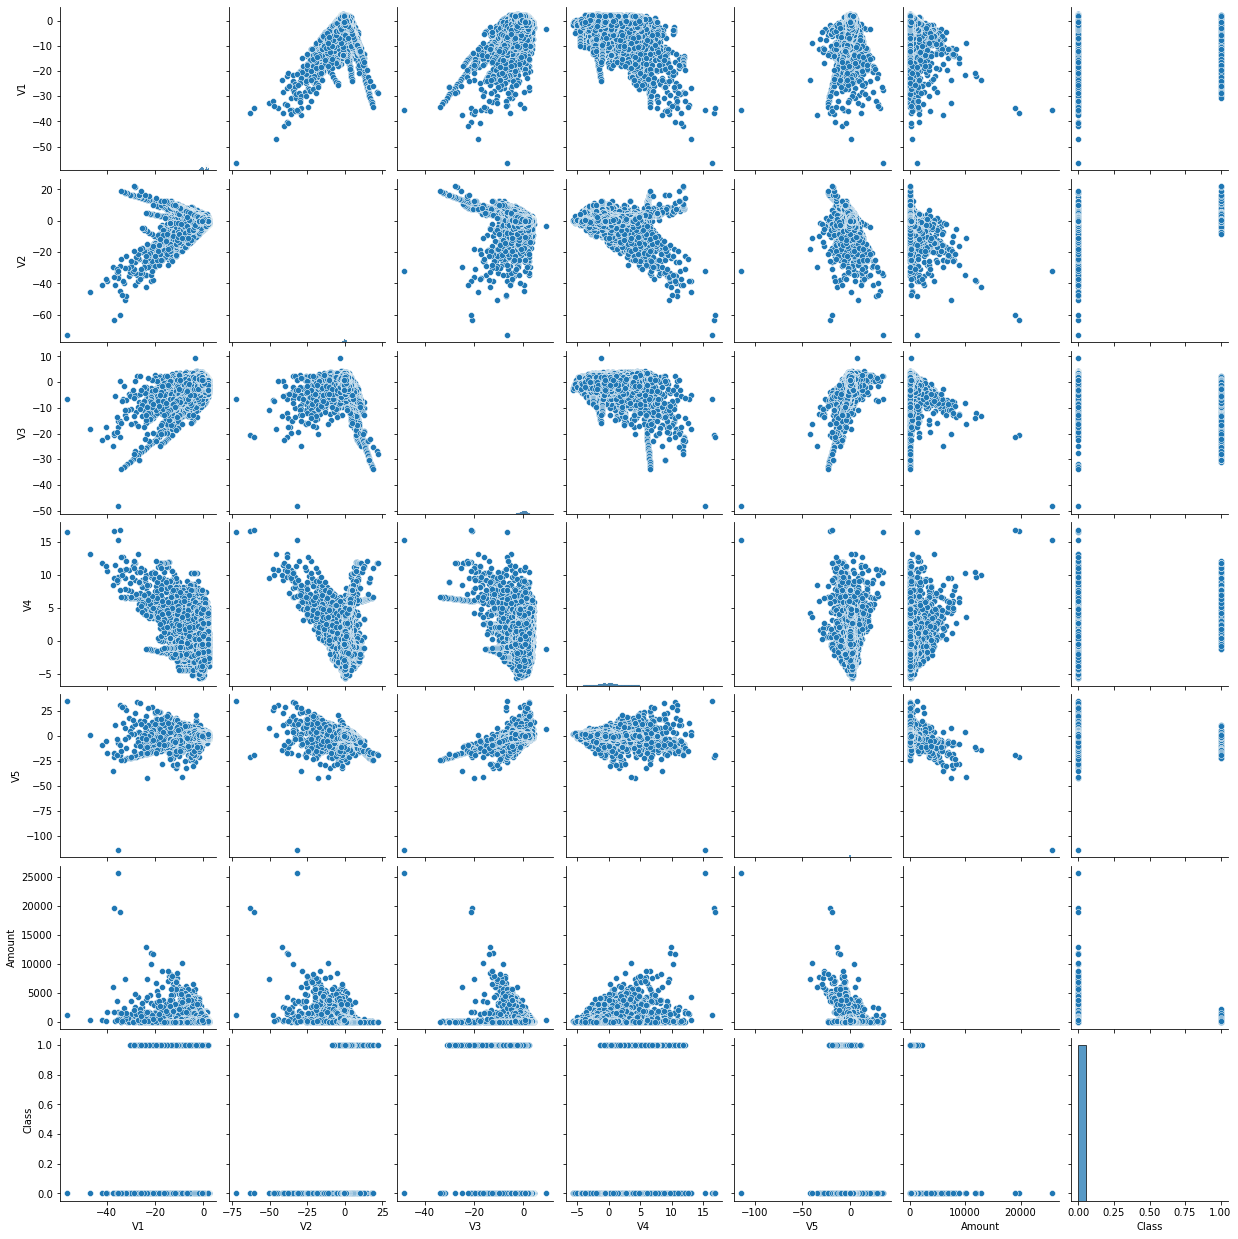

In [68]:
import seaborn as sns
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']
sns_plot = sns.pairplot(df[cols])
sns_plot

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [69]:
df.nunique()

V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X = df.drop(columns='Class', axis = 1)
Y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [72]:
X_train, X_test, y_train, y_test

(                V1        V2        V3        V4        V5        V6  \
 Time                                                                   
 2105.0   -2.289565 -0.480260  0.818685 -1.706423  0.822102 -1.660326   
 153702.0 -0.313717 -4.064342 -3.398445  0.704011  0.101662  1.529848   
 97283.0  -1.809763 -0.567439  2.265186 -0.960318 -1.212537  1.516493   
 68628.0   1.192319  0.178575  0.141491  0.459628 -0.049959 -0.112122   
 11951.0  -0.963451  0.700311  1.097333 -1.547626  0.669966  0.513533   
 ...            ...       ...       ...       ...       ...       ...   
 75618.0   1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
 159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
 79795.0  -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
 87931.0  -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
 76381.0   1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   
 
                 V7        V8        V9       V10

In [4]:
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [74]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=2)]
scores = dict()

#1
y_pred_const = np.zeros(len(X_test_norm))

#2
log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train_norm, y_train)
y_pred_log = log_reg.predict(X_test_norm)
y_pred_log_proba = log_reg.predict_proba(X_test_norm)

#3
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)

#4
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)


In [75]:

metrics = [y_pred_const, y_pred_log, y_pred_svm, y_pred_knn]
metrics_pr = [y_pred_const, y_pred_log_proba, y_pred_svm_proba, y_pred_knn_proba]
strings = ['Counter', 'LogisticRegression', 'SVM', 'KNN']

for m in range(4):
    tn, fp, fn, tp = confusion_matrix(y_test, metrics[m]).ravel()
    print(f'model: {strings[m]}')
    print(f'Logloss: {round(log_loss(y_test, metrics[m]), 3)}')
    print(f'Accuracy: {round(accuracy_score(y_test, metrics[m]), 3)}')
    print(f'Precision: {round(precision_score(y_test, metrics[m]), 3)}')
    print(f'Recall: {round(recall_score(y_test, metrics[m]), 3)}')
    print(f'F1: {round(f1_score(y_test, metrics[m]), 3)}')
    print(f'ROC AUC: {round(roc_auc_score(y_test, metrics[m]), 3)}')
    print(f'Tn: {tn}')
    print(f'Fp: {fp}')
    print(f'Fn: {fn}')
    print(f'Tp: {tp}')
    print('-'*30, '\n')

model: Counter
Logloss: 0.055
Accuracy: 0.998
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.5
Tn: 85307
Fp: 0
Fn: 136
Tp: 0
------------------------------ 

model: LogisticRegression
Logloss: 0.025
Accuracy: 0.999
Precision: 0.876
Recall: 0.625
F1: 0.73
ROC AUC: 0.812
Tn: 85295
Fp: 12
Fn: 51
Tp: 85
------------------------------ 

model: SVM
Logloss: 0.038
Accuracy: 0.999
Precision: 0.809
Recall: 0.404
F1: 0.539
ROC AUC: 0.702
Tn: 85294
Fp: 13
Fn: 81
Tp: 55
------------------------------ 

model: KNN
Logloss: 0.025
Accuracy: 0.999
Precision: 0.903
Recall: 0.618
F1: 0.734
ROC AUC: 0.809
Tn: 85298
Fp: 9
Fn: 52
Tp: 84
------------------------------ 



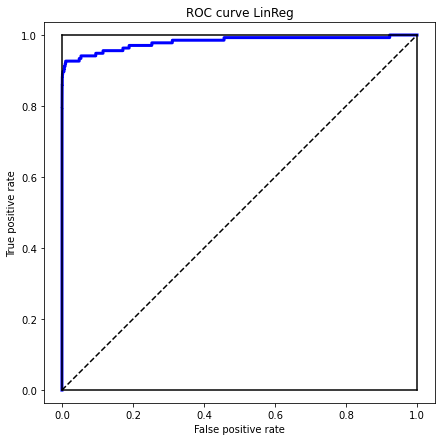

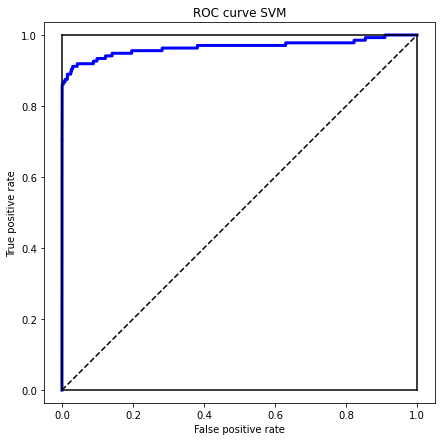

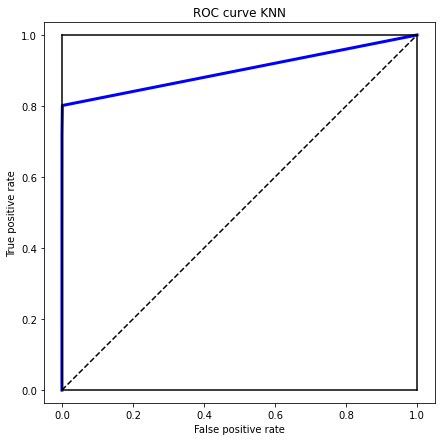

In [95]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_proba[:,1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve LinReg')
plt.show()

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba[:,1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve SVM')
plt.show()

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_proba[:,1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve KNN')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

<head>Нам важно, чтобы мы никогда не допускали фрода, поэтому нам важно перехватывать все транзакции похожие на мошенничество. Для этого будем увелчивать полноту (recall).<head>


### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [102]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

В качестве первого шага добавим вес классу 1, для этого посторим график

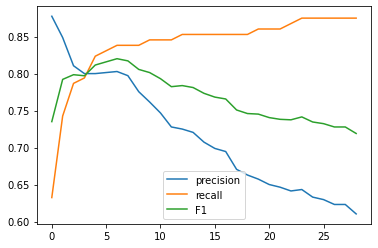

Wall time: 9min 48s


In [115]:
%%time
from sklearn.metrics import f1_score

precision_results = []
recall_results = []
f1_results = []

for first_weight in range(1, 30):
  log_reg = LogisticRegression(class_weight={0: 1, 1: first_weight}, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))
  recall_results.append(recall_score(y_test, y_pred))
  f1_results.append(f1_score(y_test, y_pred))

plt.plot(precision_results)
plt.plot(recall_results)
plt.plot(f1_results)

plt.legend(['precision', 'recall', 'F1'])

plt.show()

In [127]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

x1=np.arange(28)

fig.add_trace(go.Scatter(x=x1, y=precision_results, name = 'percision'))
fig.add_trace(go.Scatter(x=x1 , y=recall_results, name = 'recall'))
fig.add_trace(go.Scatter(x=x1, y=f1_results, name = 'f1'))



Из графика видим, что оптимальное значение веса - 6, посмотрим показетели при таком значении

In [128]:
log_reg_w = LogisticRegression(class_weight={0: 1, 1: 6},  max_iter=1000)

In [129]:
log_reg_w.fit(X_train_norm, y_train)

LogisticRegression(class_weight={0: 1, 1: 6}, max_iter=1000)

In [130]:
y_pred_w = log_reg_w.predict(X_test_norm)
y_pred_proba_w = log_reg_w.predict_proba(X_test_norm)[:, 1]

In [131]:
print(precision_score(y_test, y_pred_w))
print(recall_score(y_test, y_pred_w))

0.8014184397163121
0.8308823529411765


Как видим recall заметно улучшился

<AxesSubplot:>

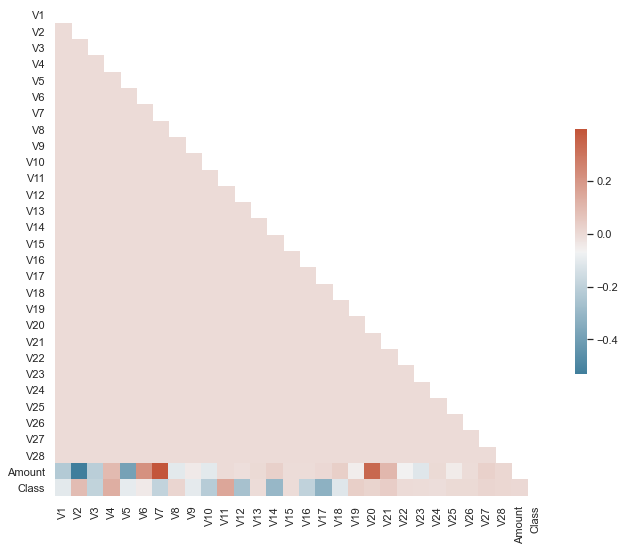

In [116]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, cbar_kws={"shrink": .5})

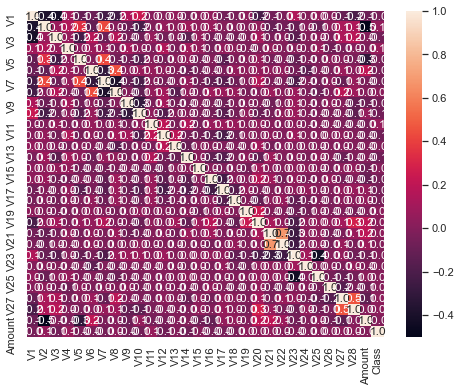

In [117]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".1f");

Теперь попробуем сделать наши выборки более сбалансированные, для этого используем метод SMOT

In [21]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print(Counter(Y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
print(Counter(y_res))



Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [17]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_norm1 = sc.fit_transform(X_train1)
X_test_norm1 = sc.transform(X_test1)

In [18]:
log_reg1 = LogisticRegression(max_iter=1000) 
log_reg1.fit(X_train_norm1, y_train1)
y_pred_log1 = log_reg1.predict(X_test_norm1)
y_pred_log_proba1 = log_reg1.predict_proba(X_test_norm1)



In [19]:
print(precision_score(y_test1, y_pred_log1))
print(recall_score(y_test1, y_pred_log1))
print(f1_score(y_test1, y_pred_log1))

0.980977329481467
0.9379447565543071
0.9589785319388268


Теперь попробуем сделать наши выборки более сбалансированные, для этого используем метод ADASYN

In [22]:
from imblearn.over_sampling import ADASYN 

print(Counter(Y))

sm = SMOTE(random_state=42)
X_resAd, y_resAd = sm.fit_resample(X, Y)
print(Counter(y_resAd))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [23]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resAd, y_resAd, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_norm2 = sc.fit_transform(X_train2)
X_test_norm2 = sc.transform(X_test2)

In [24]:
log_reg2 = LogisticRegression(max_iter=1000) 
log_reg2.fit(X_train_norm2, y_train2)
y_pred_log2 = log_reg2.predict(X_test_norm2)
y_pred_log_proba2 = log_reg2.predict_proba(X_test_norm2)


In [25]:
print(precision_score(y_test2, y_pred_log2))
print(recall_score(y_test2, y_pred_log2))
print(f1_score(y_test2, y_pred_log2))

0.980977329481467
0.9379447565543071
0.9589785319388268


Видим насколько сильно улучшились показатели по нашим моделям, те мы достигли желаемого результата.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

В даннаом датасете собраны наборы данных относящиеся к красному и белому вину, классы упорядочены и не сбалансированы

Ссылка для скачивания датасета:

https://www.kaggle.com/datasets/rajyellow46/wine-quality?datasetId=35901&sortBy=voteCount

In [5]:
df = pd.read_csv('C:/Users/Alina/Desktop/winequalityN.csv')
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.shape

(6497, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Заполиними пропуски в значениях медианным значением:

In [9]:
df.isna().sum()[:]

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
df = df.fillna(df.median())

In [11]:
df.isna().sum()[:]

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [35]:
import plotly.express as px
px.histogram(df.quality)



In [14]:
df.shape

(6497, 13)

In [15]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

<AxesSubplot:>

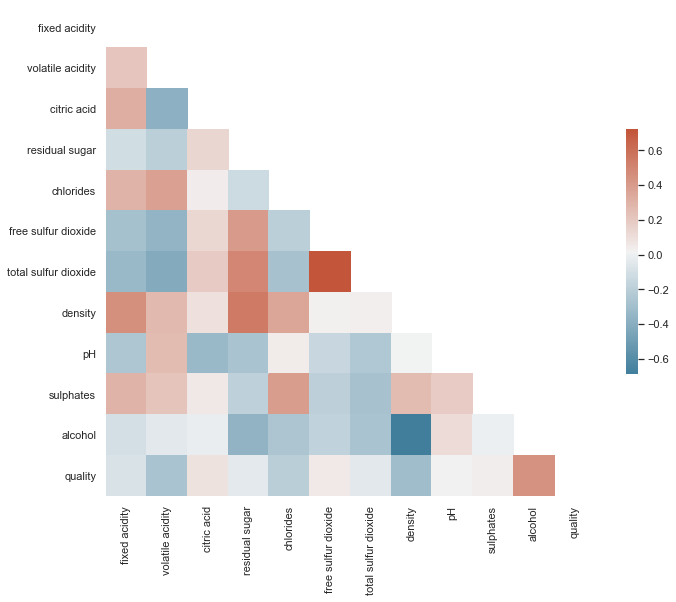

In [16]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, cbar_kws={"shrink": .5})

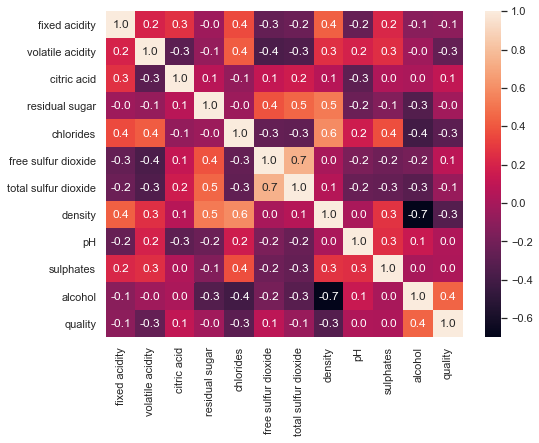

In [17]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".1f");

In [170]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

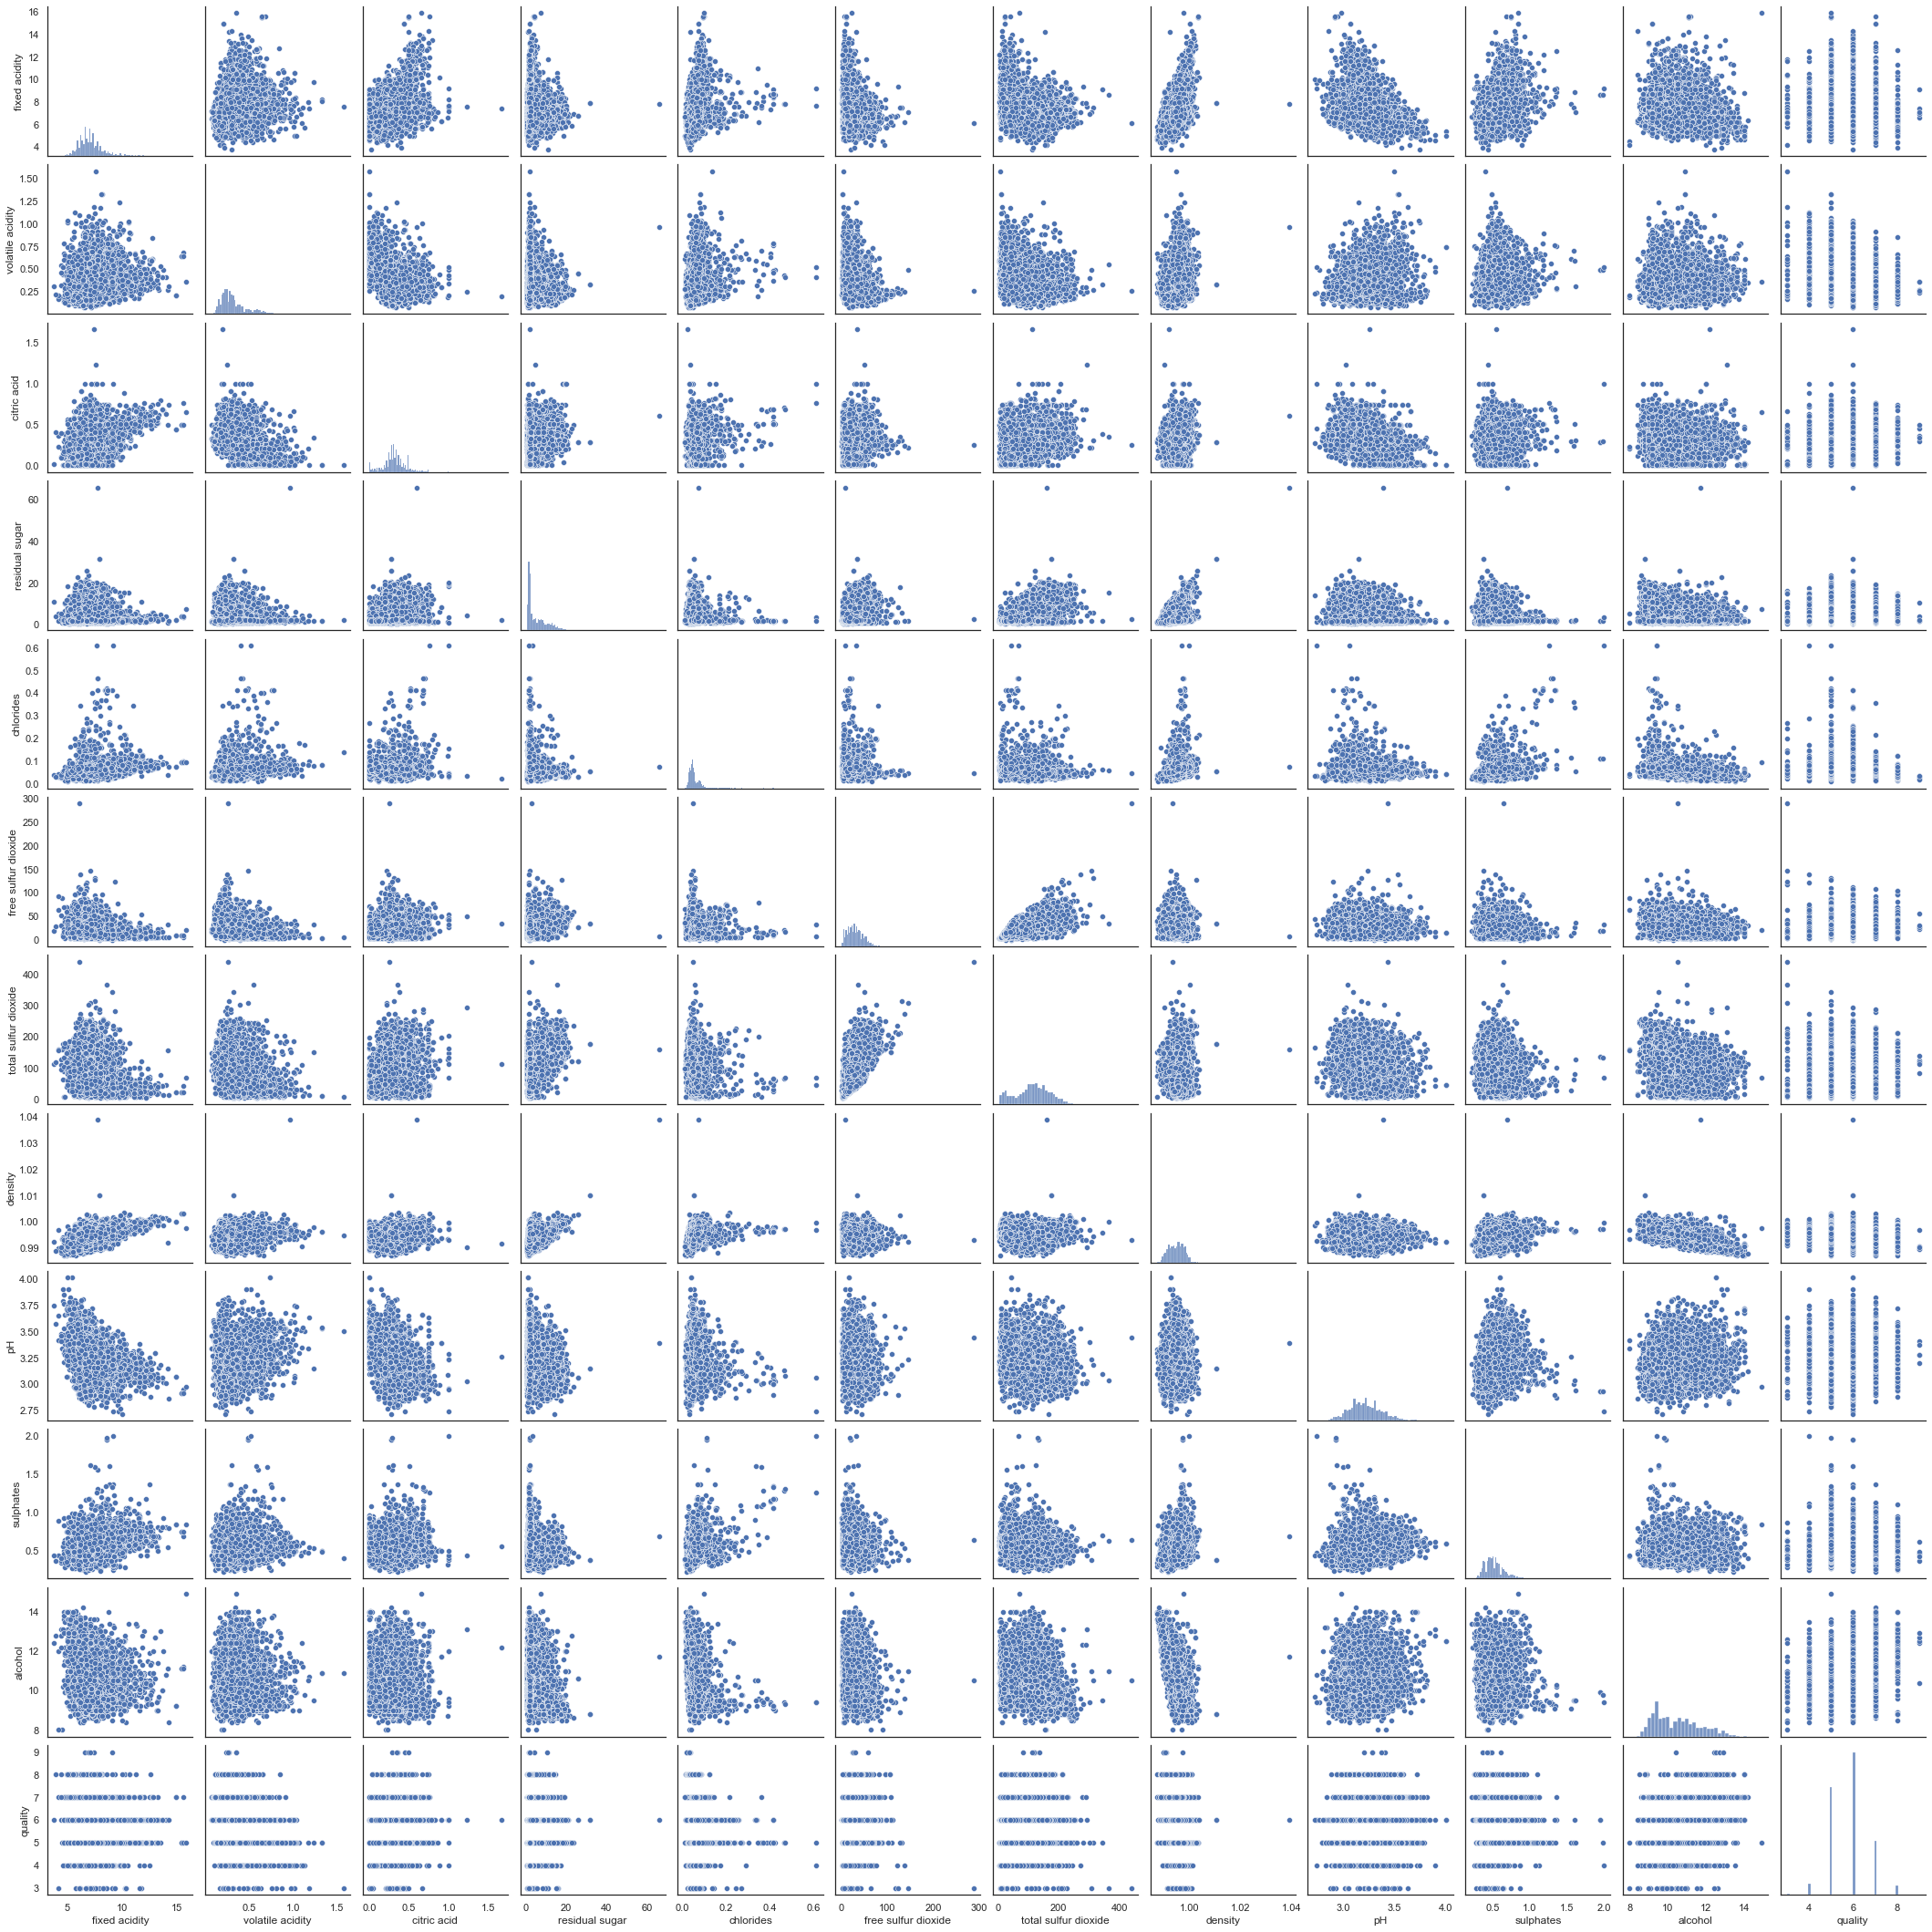

In [77]:
import seaborn as sns
cols = df.columns
sns_plot = sns.pairplot(df[cols])
sns_plot

<AxesSubplot:xlabel='quality', ylabel='count'>

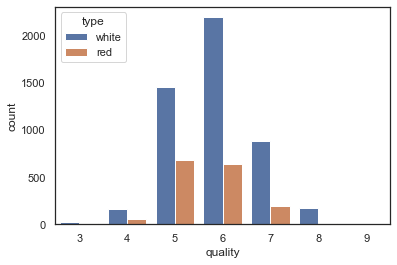

In [87]:
sns.countplot(x="quality", hue="type", data=df)

Видим разбиение по качеству и  типу вина

Рассмотрим распределения по данным

In [39]:
from scipy.stats import norm 

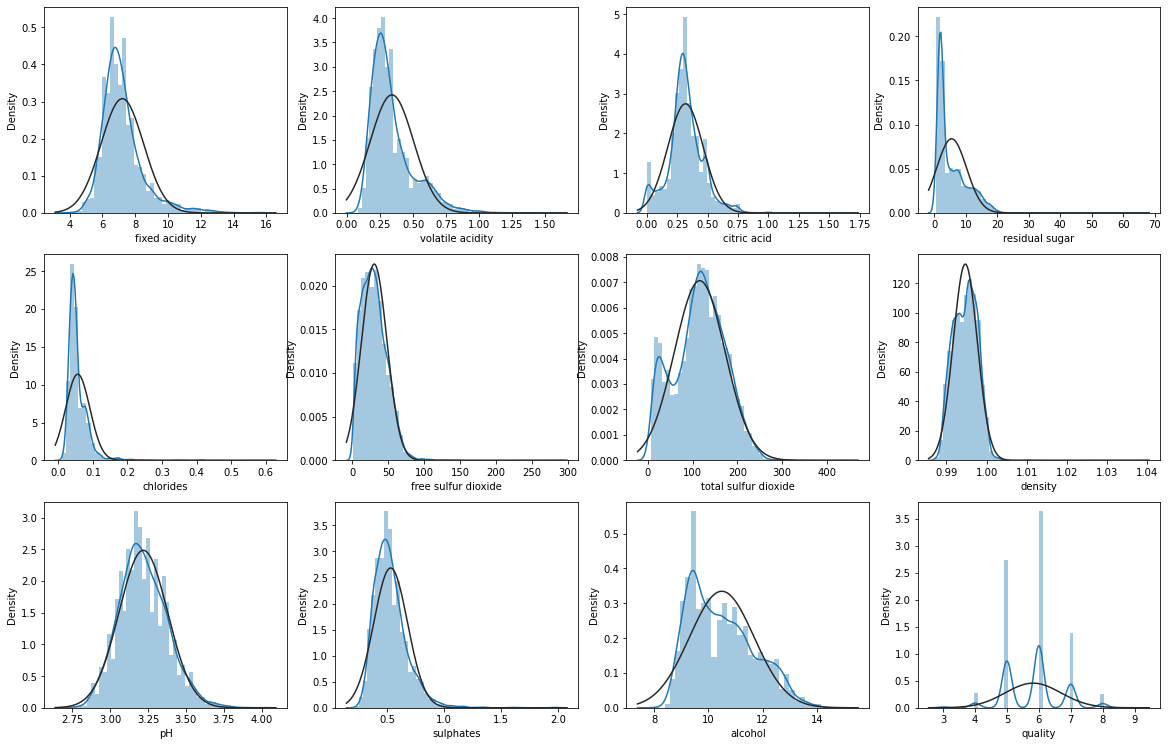

In [41]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df[df.columns[i]], fit=norm)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
df.type

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [20]:
dct = {'white':0, 'red': 1}
df.type = df.type.map(dct)

print(df.type)

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64


In [21]:
X = df.drop(columns='quality', axis = 1)
Y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', max_iter=1000) 
log_reg.fit(X_train_norm, y_train)
y_pred_log = log_reg.predict(X_test_norm)
y_pred_log_proba = log_reg.predict_proba(X_test_norm)



In [23]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_norm, y_train)
y_pred_rf = rf.predict(X_test_norm)
y_pred_rf_proba = rf.predict_proba(X_test_norm)

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_norm, y_train)
y_pred_dt = dt.predict(X_test_norm)
y_pred_dt_proba = dt.predict_proba(X_test_norm)

In [27]:
print(precision_score(y_test, y_pred_log, average='macro'))
print(precision_score(y_test, y_pred_knn, average='macro'))

0.44079413854784627
0.4109436359639998


C:\Users\alina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
import warnings

warnings.filterwarnings('ignore')

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = [y_pred_log, y_pred_svm, y_pred_knn, y_pred_rf, y_pred_dt]
#metrics_pr = [y_pred_log_proba, y_pred_svm_proba, y_pred_knn_proba, y_pred_rf_proba, y_pred_dt_proba]
strings = ['LogisticRegression', 'SVM', 'KNN', 'RandomForest', 'DecisionTree']

for m in range(5):
    print(f'model: {strings[m]}')
    print(f'Accuracy: {round(accuracy_score(y_test, metrics[m]), 3)}')
    print(f'Precision macro: {round(precision_score(y_test, metrics[m], average="macro"), 3)}')
    print(f'Precision micro: {round(precision_score(y_test, metrics[m], average="micro"), 3)}')
    print(f'Recall macro: {round(recall_score(y_test, metrics[m], average="macro"), 3)}')
    print(f'Recall micro: {round(recall_score(y_test, metrics[m], average="micro"), 3)}')
    print(f'F1 macro: {round(f1_score(y_test, metrics[m], average="macro"), 3)}')
    print(f'F1 micro: {round(f1_score(y_test, metrics[m], average="micro"), 3)}')
    print('-'*30, '\n')

model: LogisticRegression
Accuracy: 0.553
Precision macro: 0.441
Precision micro: 0.553
Recall macro: 0.25
Recall micro: 0.553
F1 macro: 0.242
F1 micro: 0.553
------------------------------ 

model: SVM
Accuracy: 0.441
Precision macro: 0.146
Precision micro: 0.441
Recall macro: 0.171
Recall micro: 0.441
F1 macro: 0.129
F1 micro: 0.441
------------------------------ 

model: KNN
Accuracy: 0.463
Precision macro: 0.411
Precision micro: 0.463
Recall macro: 0.258
Recall micro: 0.463
F1 macro: 0.277
F1 micro: 0.463
------------------------------ 

model: RandomForest
Accuracy: 0.675
Precision macro: 0.608
Precision micro: 0.675
Recall macro: 0.398
Recall micro: 0.675
F1 macro: 0.435
F1 micro: 0.675
------------------------------ 

model: DecisionTree
Accuracy: 0.611
Precision macro: 0.35
Precision micro: 0.611
Recall macro: 0.341
Recall micro: 0.611
F1 macro: 0.345
F1 micro: 0.611
------------------------------ 



Ой ой как все плохо, лучший результат дает Random Forest

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Будем увеличивать точность попадания, те percision (macro micro)

In [30]:
df.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

Воспользуемся уже знакомым нам методом для сбалансированиия классов

In [31]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print(Counter(Y))

sm = SMOTE(k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
print(Counter(y_res))



Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


Обучим нашы можели и посмотрим на результаты

In [32]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_norm1 = sc.fit_transform(X_train1)
X_test_norm1 = sc.transform(X_test1)

In [33]:
log_reg1 = LogisticRegression(max_iter=1000) 
log_reg1.fit(X_train_norm1, y_train1)
y_pred_log1 = log_reg1.predict(X_test_norm1)
y_pred_log_proba1 = log_reg1.predict_proba(X_test_norm1)

svm1 = SVC(probability=True)
svm1.fit(X_train1, y_train1)
y_pred_svm1 = svm1.predict(X_test1)
y_pred_svm_proba1 = svm1.predict_proba(X_test1)

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1, y_train1)
y_pred_knn1 = knn1.predict(X_test1)
y_pred_knn_proba1 = knn1.predict_proba(X_test1)

rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train_norm1, y_train1)
y_pred_rf1 = rf1.predict(X_test_norm1)
y_pred_rf_proba1 = rf1.predict_proba(X_test_norm1)

dt1 = DecisionTreeClassifier()
dt1.fit(X_train_norm1, y_train1)
y_pred_dt1 = dt1.predict(X_test_norm1)
y_pred_dt_proba1 = dt1.predict_proba(X_test_norm1)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = [y_pred_log1, y_pred_svm1, y_pred_knn1, y_pred_rf1, y_pred_dt1]
#metrics_pr = [y_pred_log_proba, y_pred_svm_proba, y_pred_knn_proba, y_pred_rf_proba, y_pred_dt_proba]
strings = ['LogisticRegression', 'SVM', 'KNN', 'RandomForest', 'DecisionTree']

for m in range(5):
    print(f'model: {strings[m]}')
    print(f'Accuracy: {round(accuracy_score(y_test1, metrics[m]), 3)}')
    print(f'Precision macro: {round(precision_score(y_test1, metrics[m], average="macro"), 3)}')
    print(f'Precision micro: {round(precision_score(y_test1, metrics[m], average="micro"), 3)}')
    print(f'Recall macro: {round(recall_score(y_test1, metrics[m], average="macro"), 3)}')
    print(f'Recall micro: {round(recall_score(y_test1, metrics[m], average="micro"), 3)}')
    print(f'F1 macro: {round(f1_score(y_test1, metrics[m], average="macro"), 3)}')
    print(f'F1 micro: {round(f1_score(y_test1, metrics[m], average="micro"), 3)}')
    print('-'*30, '\n')

model: LogisticRegression
Accuracy: 0.517
Precision macro: 0.508
Precision micro: 0.517
Recall macro: 0.523
Recall micro: 0.517
F1 macro: 0.512
F1 micro: 0.517
------------------------------ 

model: SVM
Accuracy: 0.333
Precision macro: 0.311
Precision micro: 0.333
Recall macro: 0.341
Recall micro: 0.333
F1 macro: 0.28
F1 micro: 0.333
------------------------------ 

model: KNN
Accuracy: 0.765
Precision macro: 0.746
Precision micro: 0.765
Recall macro: 0.768
Recall micro: 0.765
F1 macro: 0.749
F1 micro: 0.765
------------------------------ 

model: RandomForest
Accuracy: 0.881
Precision macro: 0.878
Precision micro: 0.881
Recall macro: 0.882
Recall micro: 0.881
F1 macro: 0.879
F1 micro: 0.881
------------------------------ 

model: DecisionTree
Accuracy: 0.811
Precision macro: 0.81
Precision micro: 0.811
Recall macro: 0.813
Recall micro: 0.811
F1 macro: 0.811
F1 micro: 0.811
------------------------------ 



Ура!! Random Forest опять показал себя лучше всех и мы достигли значений метрики - 0.88! ПОБЕДА